In [73]:
import sys, pickle, json, os, re
import numpy as np
from collections import defaultdict
from pprint import pprint
from typing import List, Dict, Any
sys.path.append('../src/')
sys.path.append("../../scripts/")
from utils import find_repo_root

import matplotlib.pyplot as plt
from plt_config import use_latex, TU_GREY, TU_RED
use_latex()
project_root_dir = find_repo_root()
print("Project root directory:", project_root_dir)

Project root directory: /home/etschgi1/REPOS/Masterarbeit


In [74]:
def aggregate_logs(log_lines: List[str]) -> Dict[str, List[Any]]:
    """
    Takes a list of JSON‐encoded log lines and returns
    a dict mapping each key to a list of its values across lines.
    """
    agg: Dict[str, List[Any]] = defaultdict(list)
    for line in log_lines:
        entry = json.loads(line)
        for k, v in entry.items():
            agg[k].append(v)
    return dict(agg)

In [75]:
# gather data to data json
data_aug_train_data_path = os.path.join(project_root_dir, "latex/scripts/application/data/combined_data.json")
data_orig_source = os.path.join(project_root_dir, "3_studies/Block_guessing/6-31g_testing/tune_logs/MGNN_hyp_data_aug_only.py")
if not os.path.exists(data_aug_train_data_path): 
    model_paths = [os.path.join(data_orig_source, folder) for folder in os.listdir(data_orig_source) if os.path.isdir(os.path.join(data_orig_source, folder))]
    combined_name = data_orig_source.split("/")[-1].replace("py", "json")
    combined_data = {}
    for path in model_paths: 
        nice_key = re.search("_[0-9]+_.*_2025", path).group(0)
        data = aggregate_logs(open(os.path.join(path, "result.json")).readlines())
        combined_data[nice_key] = data
    with open(data_aug_train_data_path, "w") as f:
        json.dump(combined_data, f, indent=4)
else:
    with open(data_aug_train_data_path, "r") as f:
        combined_data = json.load(f)

Processing _00000_0_data_aug_factor=1.0000_2025 
data_aug: 1.0, train_loss: [81.84972778320312, 39.82348342895508, 35.384899368286135, 33.62747604370117, 32.82409309387207, 32.35485527038574, 32.01083824157715, 31.765088958740236, 31.5792830657959, 31.418293380737303, 31.31067283630371, 31.200578536987305, 30.5861083984375, 30.307701416015625, 30.213317413330078, 30.14363670349121, 30.087782974243165, 30.035049743652344, 29.71352813720703, 29.609410171508788, 29.567957611083983, 29.53494644165039, 29.508221282958985, 29.481420593261717], val_loss: [45.55305004119873, 37.78694438934326, 35.56363296508789, 34.64999485015869, 34.15578651428223, 33.89836597442627, 33.69423484802246, 33.626590728759766, 33.63477897644043, 33.598389625549316, 33.613362312316895, 33.599663734436035, 33.08889293670654, 33.06424331665039, 33.08357906341553, 33.08772945404053, 33.08581066131592, 33.111310958862305, 32.90701675415039, 32.919962882995605, 32.9137020111084, 32.92464351654053, 32.93284034729004, 32.

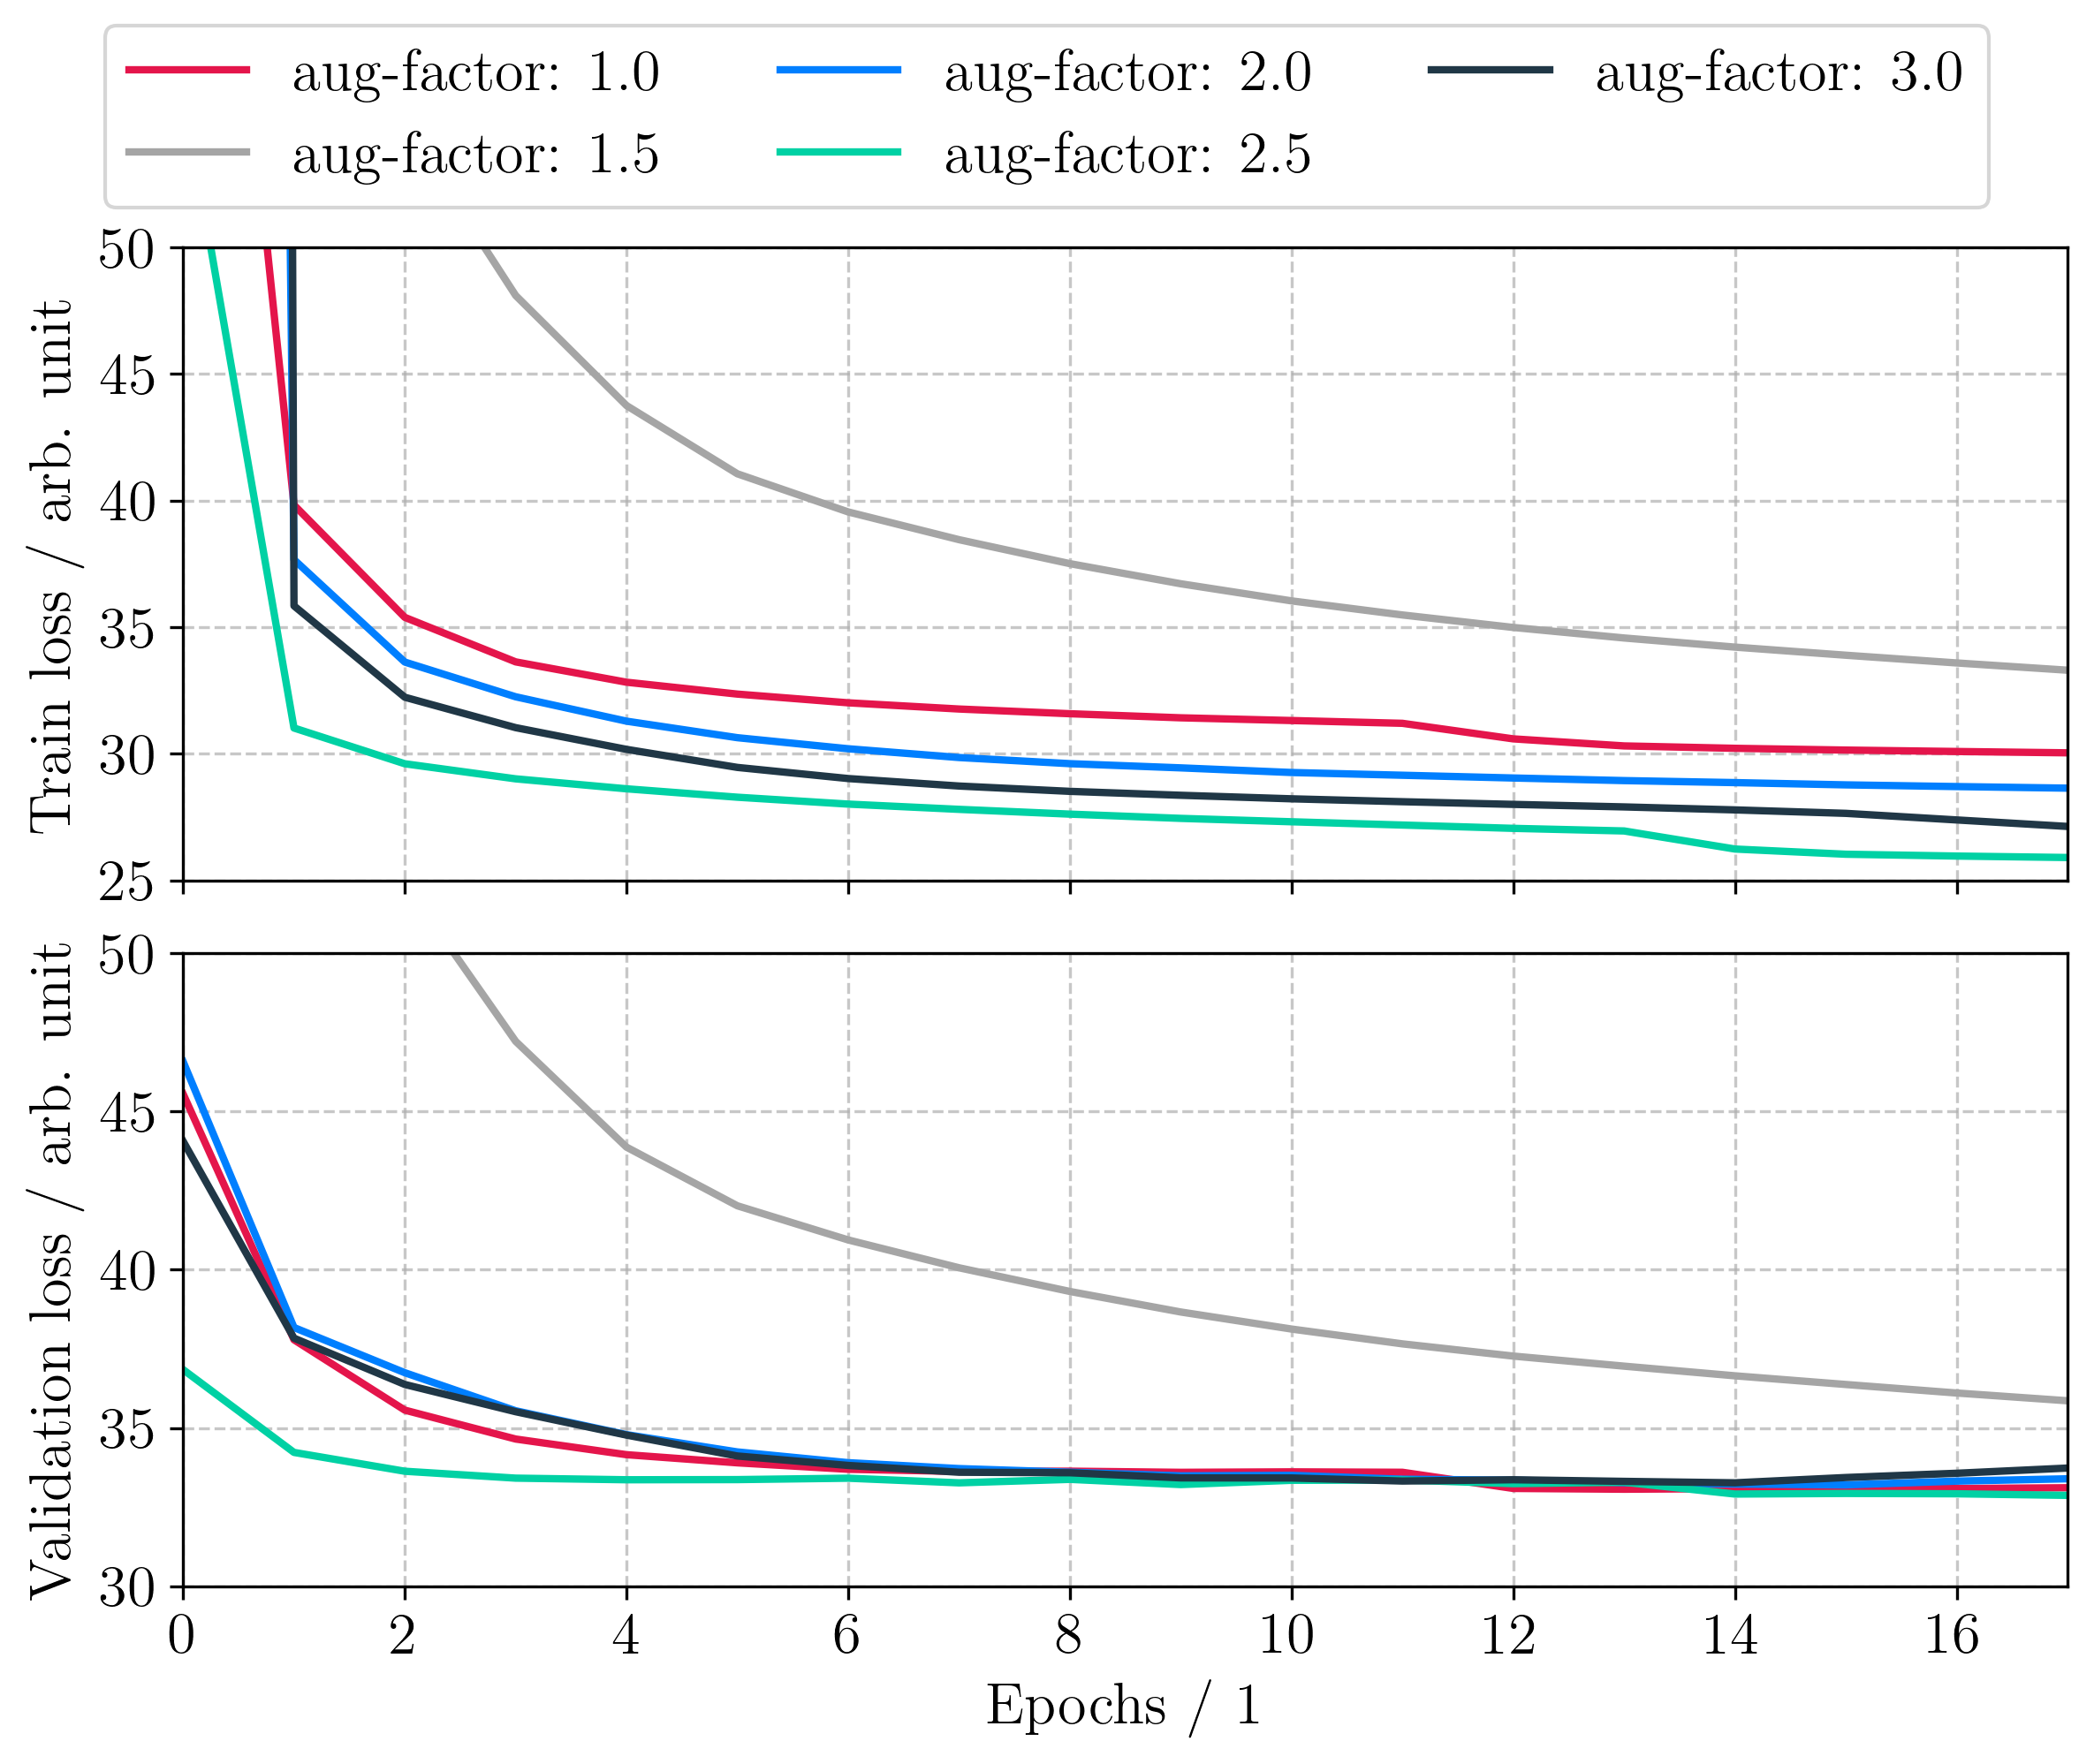

In [76]:
fig, ax = plt.subplots(figsize=(8, 6), nrows=2, ncols=1, sharex=True)
combined_data = {k: combined_data[k] for k in sorted(combined_data.keys())}
for key, res in combined_data.items():
    print(f"Processing {key} ")
    try:
        val_loss = res["loss"]
        train_loss = res["train_loss"]
    except: 
        pass # nothing in there
    data_fact = re.search("=.*_", key).group(0)[1:-4]
    print(f"data_aug: {data_fact}, train_loss: {train_loss}, val_loss: {val_loss}")
    # if "5" in data_fact:
    #     print("skip", data_fact)
    #     continue
    ax[0].plot(train_loss, label=f"aug-factor: {data_fact}", alpha=1)
    ax[1].plot(val_loss, label=f"aug-factor: {data_fact}", alpha=1)
ax[0].set_ylim((25,50))
ax[1].set_ylim((30,50))
ax[0].set_ylabel("Train loss / arb. unit")
ax[1].set_ylabel("Validation loss / arb. unit")
ax[1].set_xlabel("Epochs / 1")
plt.xlim((0,17))
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels,
           loc="upper center",
           ncol=3,
           bbox_to_anchor=(0.5, 1.12),
           frameon=True)
plt.tight_layout()
plt.savefig(os.path.join(project_root_dir, "latex/fig/application/aug_train_val_loss.pdf"), bbox_inches='tight')